# Waste Classification using CNN Model

### Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [4]:
train_path="/Users/noorshaik/Desktop/Waste Classification/DATASET/DATASET/TRAIN"
test_path="/Users/noorshaik/Desktop/Waste Classification/DATASET/DATASET/TEST"

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
x_data=[]
y_data=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data=pd.DataFrame({'image':x_data, 'label':y_data})

100%|███████████████████████████████████| 12565/12565 [00:04<00:00, 2723.52it/s]


In [7]:
data.shape

(22564, 2)

### Data Visualization 

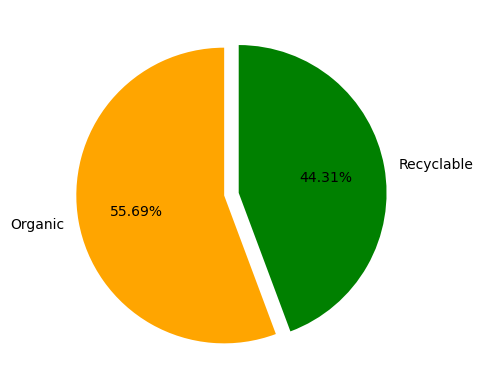

In [16]:
colors=['orange','green']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'] , autopct="%0.2f%%",colors=colors, startangle=90, explode=[0.05,0.05])
plt.show()

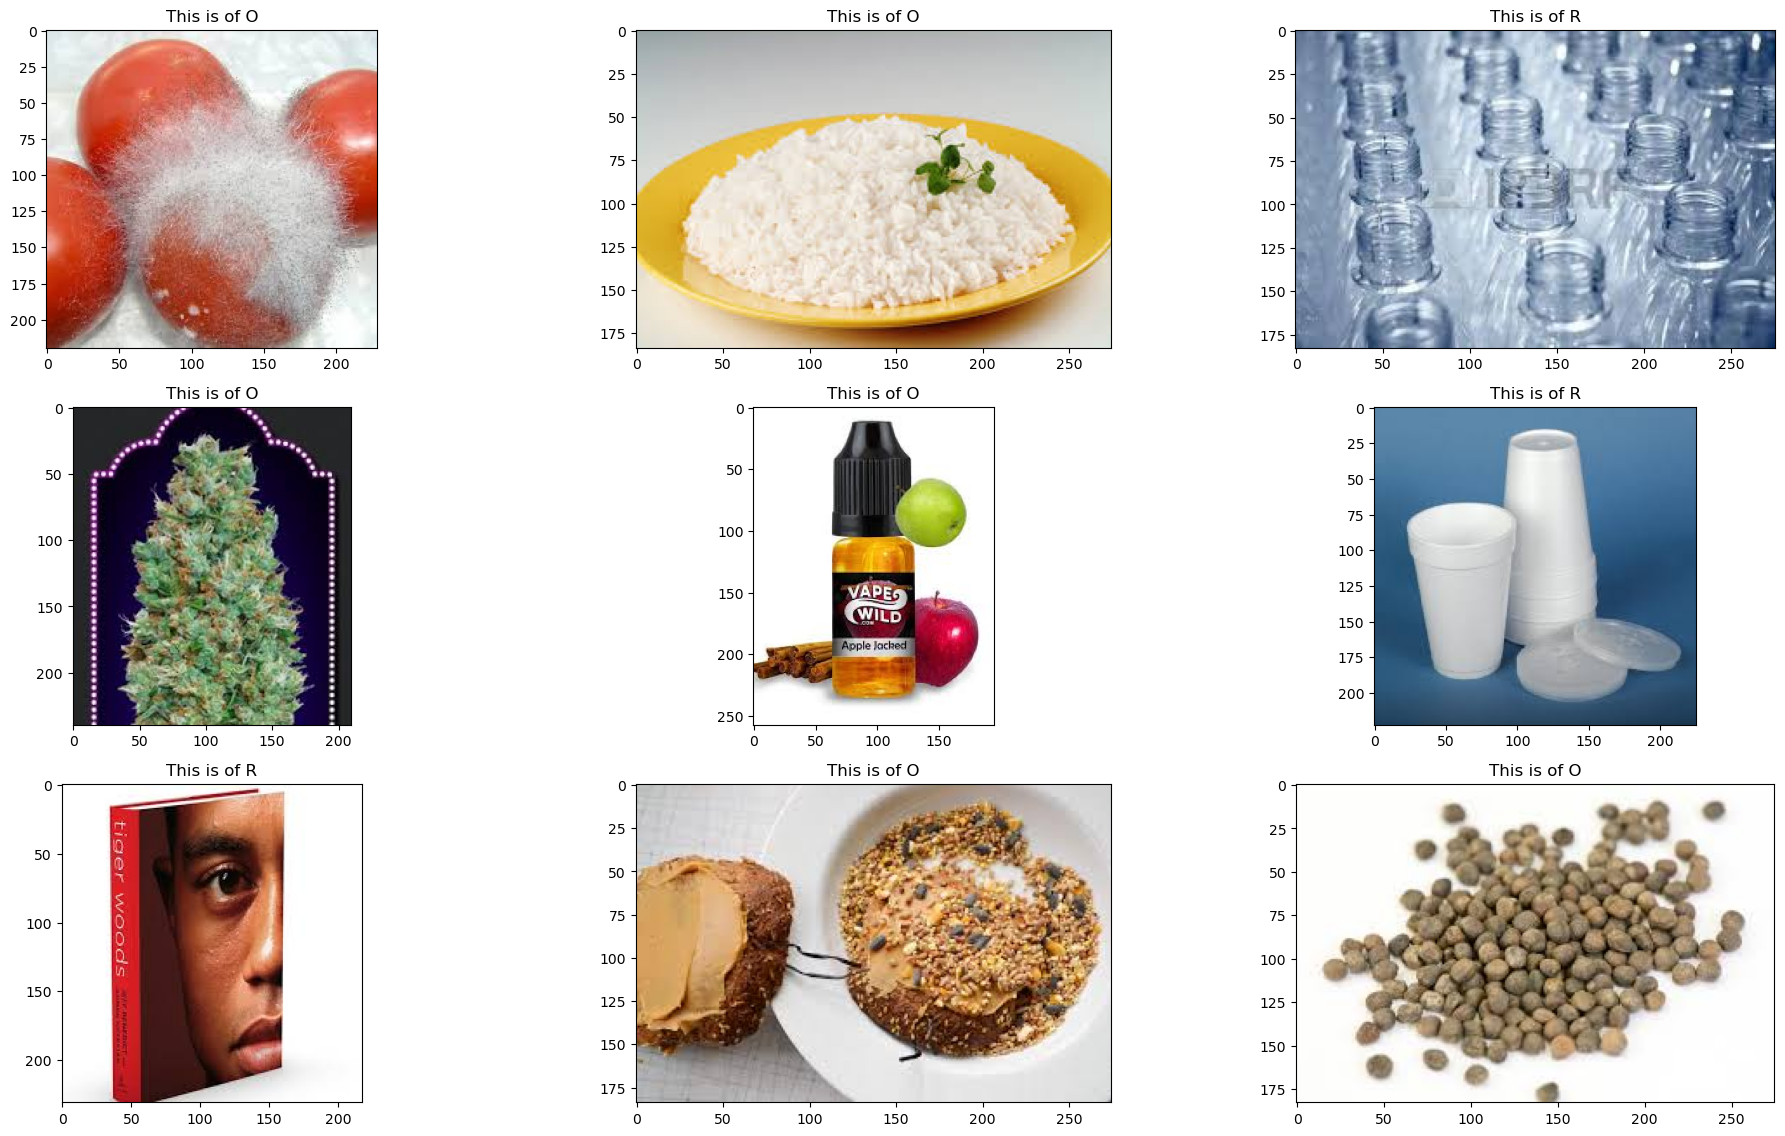

In [17]:
plt.figure(figsize=(20, 15))
for i in range(9):
    plt.subplot(4, 3,(i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

### CNN - Convolutional Neural Network

In [18]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 activation (Activation)     (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_1 (Activation)   (None, 109, 109, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size = (224, 224),
    batch_size = batch_size, 
    color_mode = "rgb", 
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [23]:
hist = model.fit(
    train_generator, 
    epochs=10, 
    validation_data=test_generator
)

Epoch 1/10
89/89 [==============================] - 565s 6s/step - loss: 0.4941 - accuracy: 0.7859 - val_loss: 0.3392 - val_accuracy: 0.8854
Epoch 2/10
89/89 [==============================] - 565s 6s/step - loss: 0.3911 - accuracy: 0.8408 - val_loss: 0.2968 - val_accuracy: 0.8894
Epoch 3/10
89/89 [==============================] - 556s 6s/step - loss: 0.3613 - accuracy: 0.8580 - val_loss: 0.2697 - val_accuracy: 0.9025
Epoch 4/10
89/89 [==============================] - 570s 6s/step - loss: 0.3255 - accuracy: 0.8683 - val_loss: 0.2635 - val_accuracy: 0.9021
Epoch 5/10
89/89 [==============================] - 566s 6s/step - loss: 0.3049 - accuracy: 0.8799 - val_loss: 0.2565 - val_accuracy: 0.8961
Epoch 6/10
89/89 [==============================] - 580s 7s/step - loss: 0.2743 - accuracy: 0.8930 - val_loss: 0.2531 - val_accuracy: 0.8965
Epoch 7/10
89/89 [==============================] - 574s 6s/step - loss: 0.2392 - accuracy: 0.9073 - val_loss: 0.2637 - val_accuracy: 0.9021
Epoch 8/10
89